# Imports 

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [253]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 14
sns.set(rc={ 'axes.facecolor':'white', 'figure.facecolor':'white' ,'legend.frameon': False})

In [254]:
obs = pd.read_csv('observations.csv')
spec = pd.read_csv('species_info.csv')

# Import data

In [255]:
print(obs.head())
print(spec.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                                     common_names  \
0                                        Gapper's Red-Backed Vole   
1                                           American Bison, Bison   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Do

Observations.csv => obs dataframe:
<ul>
<li>scientific_name - scientific name of species, nominal variables</li>
<li>Park_name = location of park, nominal variables</li>
<li>observations - quantity of the species, numeric variables </li>
</ul>

species_info.csv => spec dataframe:
<ul>
<li>category - category for the species, categorical variables</li>
<li>scientific_name - scientific name of species, nominal variables</li>
<li>common_name - general name for species</li>
<li>conservation_status - threatened or endangered</li>
</ul>

In [256]:
print(obs.isnull().sum())

scientific_name    0
park_name          0
observations       0
dtype: int64


In [257]:
print(obs.isnull().sum())

scientific_name    0
park_name          0
observations       0
dtype: int64


In [258]:
print(obs.shape)
print(spec.shape)

(23296, 3)
(5824, 4)


In [259]:
dup_obs = obs[obs.duplicated(keep=False)]
dup_obs

,scientific_name,park_name,observations
365,Plantago major,Great Smoky Mountains National Park,90
513,Arctium minus,Yosemite National Park,162
627,Spilogale putorius,Yellowstone National Park,256
1020,Eleocharis palustris,Great Smoky Mountains National Park,62
1032,Hesperis matronalis,Bryce National Park,124
1454,Echinochloa crus-galli,Great Smoky Mountains National Park,62
1635,Streptopelia decaocto,Yellowstone National Park,255
4178,Monotropa hypopithys,Great Smoky Mountains National Park,73
4527,Botrychium virginianum,Yellowstone National Park,232
7219,Prunella vulgaris,Great Smoky Mountains National Park,75


In [260]:
obs_clean = obs.groupby(['scientific_name', 'park_name']).mean().reset_index()

In [261]:
obs_clean.tail(20)

,scientific_name,park_name,observations
22144,Zonotrichia leucophrys gambelii,Bryce National Park,58.0
22145,Zonotrichia leucophrys gambelii,Great Smoky Mountains National Park,87.0
22146,Zonotrichia leucophrys gambelii,Yellowstone National Park,246.0
22147,Zonotrichia leucophrys gambelii,Yosemite National Park,169.0
22148,Zonotrichia leucophrys oriantha,Bryce National Park,73.0
22149,Zonotrichia leucophrys oriantha,Great Smoky Mountains National Park,123.0
22150,Zonotrichia leucophrys oriantha,Yellowstone National Park,227.0
22151,Zonotrichia leucophrys oriantha,Yosemite National Park,135.0
22152,Zonotrichia querula,Bryce National Park,105.0
22153,Zonotrichia querula,Great Smoky Mountains National Park,83.0


In [262]:
spec_clean = spec.drop_duplicates(subset = ['scientific_name', 'category'])

In [263]:
spec_clean.tail(20)

,category,scientific_name,common_names,conservation_status
5804,Vascular Plant,Saxifraga californica,California Saxifrage,NaN
5805,Vascular Plant,Saxifraga mertensiana,"Merten's Saxifrage, Wood Saxifrage, Woodland Saxifrage",NaN
5806,Vascular Plant,Saxifraga nidifica var. nidifica,Peak Saxifrage,NaN
5807,Vascular Plant,Saxifraga oregana,"Box Saxifrage, Oregon Saxifrage",NaN
5808,Vascular Plant,Saxifraga tolmiei,"Alpine Saxifrage, Tolmie's Saxifrage",NaN
5809,Vascular Plant,Selaginella hansenii,Hansen's Spikemoss,NaN
5810,Vascular Plant,Selaginella watsonii,"Alpine Spikemoss, Watson's Spikemoss",NaN
5811,Vascular Plant,Calystegia malacophylla ssp. malacophylla,Sierra False Bindweed,NaN
5812,Vascular Plant,Cuscuta californica var. breviflora,"California Dodder, Chaparral Dodder, Western Dodder",NaN
5813,Vascular Plant,Cuscuta californica var. californica,"California Dodder, Chaparral Dodder",NaN


In [264]:
print(obs_clean.shape)
print(spec_clean.shape)

(22164, 3)
(5541, 4)


In [265]:
print(obs_clean.columns)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')


In [266]:
df = obs_clean.merge(spec_clean, how='left')
print(df.shape)

(22164, 6)


In [267]:
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Abies bifolia,Bryce National Park,109.0,Vascular Plant,Rocky Mountain Alpine Fir,NaN
1,Abies bifolia,Great Smoky Mountains National Park,72.0,Vascular Plant,Rocky Mountain Alpine Fir,NaN
2,Abies bifolia,Yellowstone National Park,215.0,Vascular Plant,Rocky Mountain Alpine Fir,NaN
3,Abies bifolia,Yosemite National Park,136.0,Vascular Plant,Rocky Mountain Alpine Fir,NaN
4,Abies concolor,Bryce National Park,83.0,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver Fir, White Balsam, White Fir",NaN


In [268]:
df.isnull().sum()

scientific_name            0
park_name                  0
observations               0
category                   0
common_names               0
conservation_status    21452
dtype: int64

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 22163
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   scientific_name      22164 non-null  object 
 1   park_name            22164 non-null  object 
 2   observations         22164 non-null  float64
 3   category             22164 non-null  object 
 4   common_names         22164 non-null  object 
 5   conservation_status  712 non-null    object 
dtypes: float64(1), object(5)
memory usage: 1.2+ MB


In [270]:
df.describe()

,observations
count,22164.000000
mean,142.314609
std,69.805688
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [271]:
df.select_dtypes(include='object').describe()

,scientific_name,park_name,category,common_names,conservation_status
count,22164,22164,22164,22164,712
unique,5541,4,7,5229,4
top,Triteleia grandiflora var. grandiflora,Yellowstone National Park,Vascular Plant,Brachythecium Moss,Species of Concern
freq,4,5541,17048,28,604


In [272]:
print(df.category.unique())

['Vascular Plant' 'Nonvascular Plant' 'Bird' 'Amphibian' 'Reptile'
 'Mammal' 'Fish']


In [273]:
print(df.conservation_status.unique())

[nan 'Species of Concern' 'Threatened' 'Endangered' 'In Recovery']


In [213]:
print(df.park_name.unique())

['Bryce National Park' 'Great Smoky Mountains National Park'
 'Yellowstone National Park' 'Yosemite National Park']


In [214]:
species_by_category = df.groupby(['category']).scientific_name.nunique().reset_index(name='species_count')
species_by_category = species_by_category.sort_values(by='species_count', ascending=False)
species_by_category

,category,species_count
6,Vascular Plant,4262
1,Bird,488
4,Nonvascular Plant,333
3,Mammal,176
2,Fish,125
0,Amphibian,79
5,Reptile,78


In [215]:
species_count_park = df.groupby(['category', 'park_name']).scientific_name.count().reset_index(name='name_count')
species_count_park = species_count_park.sort_values(by='name_count', ascending=False)
species_count_park

,category,park_name,name_count
27,Vascular Plant,Yosemite National Park,4262
26,Vascular Plant,Yellowstone National Park,4262
25,Vascular Plant,Great Smoky Mountains National Park,4262
24,Vascular Plant,Bryce National Park,4262
4,Bird,Bryce National Park,488
5,Bird,Great Smoky Mountains National Park,488
6,Bird,Yellowstone National Park,488
7,Bird,Yosemite National Park,488
19,Nonvascular Plant,Yosemite National Park,333
18,Nonvascular Plant,Yellowstone National Park,333


In [216]:
def bar_plot(x,y, data, titl, x_label, y_label, hue=None):
    fig, ax = plt.subplots(figsize=(10,8))
    sns.barplot(x=x, y=y,hue=hue, data=data, palette='rocket', ax=ax)
    ax.set_title(titl)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    return plt.show()

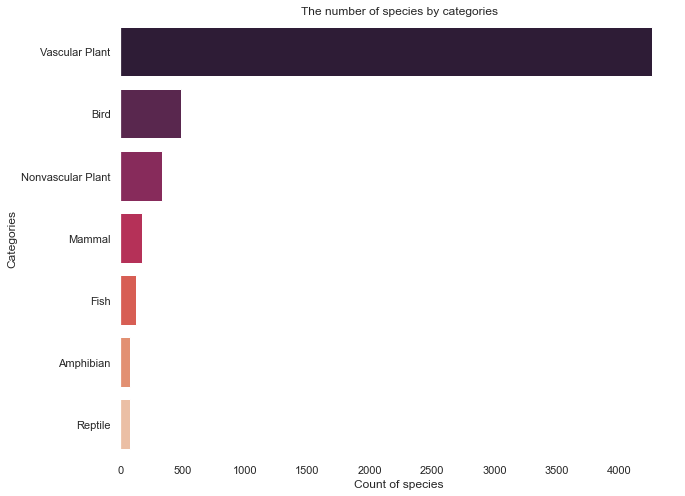

In [217]:
bar_plot(x='species_count', y='category', data=species_by_category, titl='The number of species by categories', x_label='Count of species', y_label='Categories',hue=None)

In [218]:
def bar_plot_hue(x,y, data, titl, x_label, y_label, labels, hue=None):
    fig, ax = plt.subplots(figsize=(10,8))
    sns.barplot(x=x, y=y,hue=hue, data=data, palette='rocket', ax=ax)
    ax.set_title(titl)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticklabels(labels, rotation=40, ha='center', minor=False)
    ax.legend(loc='best', bbox_to_anchor=(1,1))
    return plt.show()

In [220]:
conservation_status = df.groupby(['conservation_status'], dropna=False).scientific_name.nunique().reset_index(name='species_count')
conservation_status =  conservation_status.sort_values(by=['species_count'], ascending=False)
conservation_status

,conservation_status,species_count
4,NaN,5363
2,Species of Concern,151
0,Endangered,15
3,Threatened,9
1,In Recovery,3


In [221]:
sums = conservation_status['species_count'].sum()

In [222]:
conservation_status['percentage'] = conservation_status[['species_count']].apply(lambda x: x/x.sum())

In [223]:
conservation_status

,conservation_status,species_count,percentage
4,NaN,5363,0.967876
2,Species of Concern,151,0.027251
0,Endangered,15,0.002707
3,Threatened,9,0.001624
1,In Recovery,3,0.000541


In [224]:
'drop Nan values'
conservation_only = conservation_status.dropna().reset_index()
conservation_only

,index,conservation_status,species_count,percentage
0,2,Species of Concern,151,0.027251
1,0,Endangered,15,0.002707
2,3,Threatened,9,0.001624
3,1,In Recovery,3,0.000541


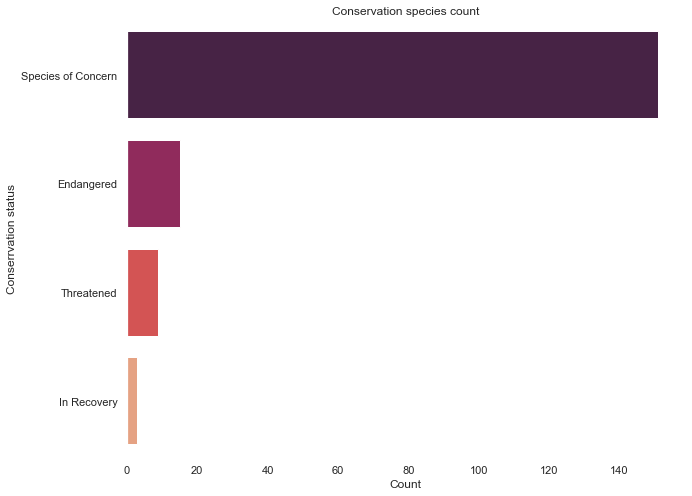

In [225]:
bar_plot(x='species_count',y='conservation_status', data=conservation_only, titl='Conservation species count', x_label='Count', y_label='Conserrvation status', hue=None)

In [226]:
conservation_status.loc[conservation_status['conservation_status'].isna() , 'conservation_status']= 'not_conservation'
conservation_status

,conservation_status,species_count,percentage
4,not_conservation,5363,0.967876
2,Species of Concern,151,0.027251
0,Endangered,15,0.002707
3,Threatened,9,0.001624
1,In Recovery,3,0.000541


In [227]:
not_conservation = (conservation_status.loc[conservation_status['conservation_status'] == 'not_conservation', 'percentage']).sum()
print(not_conservation) 
conservation = (conservation_status.loc[conservation_status['conservation_status'] != 'not_conservation', 'percentage']).sum()
print(conservation)

0.9678758346868797
0.03212416531312037


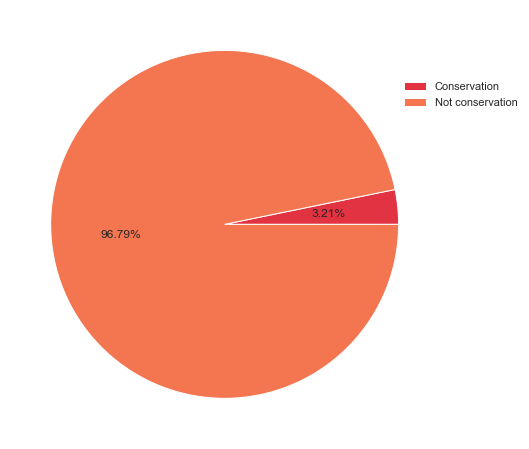

In [228]:
fig, ax = plt.subplots(figsize=(10,8))
colors = sns.color_palette('rocket')[3:5]
ax = plt.pie([conservation, not_conservation], autopct='%0.2f%%', colors=colors)
plt.legend(['Conservation', 'Not conservation'], loc='best', bbox_to_anchor=(0.89,0.85) )
plt.show()

In [229]:
conservation_category = df.groupby(['category', 'conservation_status']).scientific_name.nunique().reset_index(name='count')
conservation_category

,category,conservation_status,count
0,Amphibian,Endangered,1
1,Amphibian,Species of Concern,4
2,Amphibian,Threatened,2
3,Bird,Endangered,4
4,Bird,In Recovery,3
5,Bird,Species of Concern,68
6,Fish,Endangered,3
7,Fish,Species of Concern,4
8,Fish,Threatened,3
9,Mammal,Endangered,6


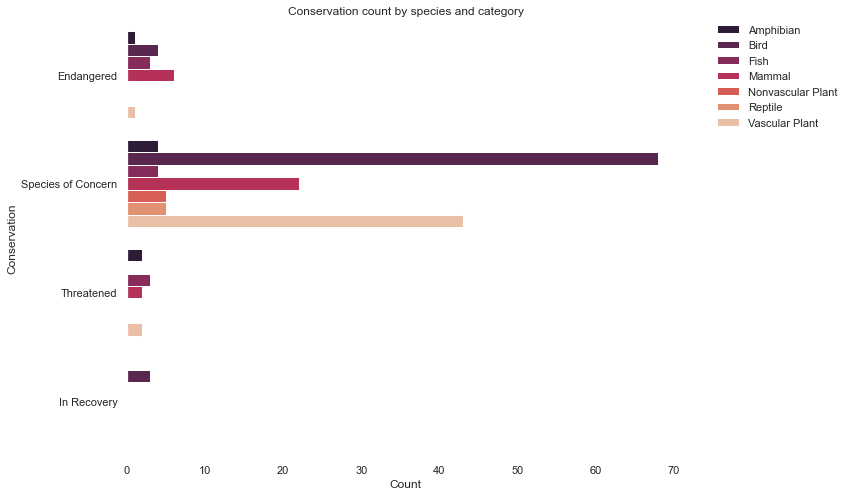

In [230]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x='count', y='conservation_status',hue='category', data=conservation_category, palette='rocket')
ax.set_title('Conservation count by species and category')
ax.set_xlabel('Count')
ax.set_ylabel('Conservation')
ax.legend(loc='upper left', bbox_to_anchor=(1.05,1), borderaxespad=0.)
plt.show()

<h1>Top 5 Species by filtered conservation and park name</h1>

In [231]:
def top_status_park(n, status, park_name,df):
    filtered_data = df[(df.park_name == park_name) & (df.conservation_status == status)] 
    filtered_data = filtered_data.sort_values('observations')
    return filtered_data.head(n)

In [232]:
conservation_types = ['Species of Concern', 'Threatened' ,'Endangered' ,'In Recovery']
park_types = ['Bryce National Park', 'Great Smoky Mountains National Park','Yellowstone National Park','Yosemite National Park']

In [233]:
top_status_park(5, conservation_types[0], park_types[0], df)

,scientific_name,park_name,observations,category,common_names,conservation_status
15316,Plagiomnium carolinianum,Bryce National Park,49.0,Nonvascular Plant,Carolina Plagiomnium Moss,Species of Concern
4428,Cathartes aura,Bryce National Park,49.0,Bird,Turkey Vulture,Species of Concern
15264,Piranga rubra,Bryce National Park,51.0,Bird,Summer Tanager,Species of Concern
16956,Rallus elegans,Bryce National Park,53.0,Bird,King Rail,Species of Concern
5716,Cottus bairdii,Bryce National Park,56.0,Fish,Mottled Sculpin,Species of Concern


In [234]:
top_status_park(5, conservation_types[1], park_types[0], df)

,scientific_name,park_name,observations,category,common_names,conservation_status
16972,Rana draytonii,Bryce National Park,37.0,Amphibian,California Red-Legged Frog,Threatened
21212,Ursus arctos horribilis,Bryce National Park,38.0,Mammal,Grizzly Bear,Threatened
10428,Isotria medeoloides,Bryce National Park,42.0,Vascular Plant,Small Whorled Pogonia,Threatened
956,Anaxyrus canorus,Bryce National Park,43.0,Amphibian,Yosemite Toad,Threatened
7844,Erimonax monachus,Bryce National Park,46.0,Fish,Spotfin Chub,Threatened


In [235]:
top_status_park(5, conservation_types[2], park_types[0], df)

,scientific_name,park_name,observations,category,common_names,conservation_status
21424,Vermivora bachmanii,Bryce National Park,20.0,Bird,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
13576,Noturus baileyi,Bryce National Park,22.0,Fish,Smoky Madtom,Endangered
13968,Ovis canadensis sierrae,Bryce National Park,22.0,Mammal,Sierra Nevada Bighorn Sheep,Endangered
4824,Chasmistes liorus,Bryce National Park,23.0,Fish,June Sucker,Endangered
9292,Grus americana,Bryce National Park,24.0,Bird,Whooping Crane,Endangered


In [236]:
top_status_park(5, conservation_types[3], park_types[0], df)

,scientific_name,park_name,observations,category,common_names,conservation_status
8452,Falco peregrinus anatum,Bryce National Park,72.0,Bird,American Peregrine Falcon,In Recovery
14376,Pelecanus occidentalis,Bryce National Park,92.0,Bird,Brown Pelican,In Recovery
9384,Haliaeetus leucocephalus,Bryce National Park,94.0,Bird,Bald Eagle,In Recovery


<h1>Overall Top 5 Species</h1> 

In [237]:
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Abies bifolia,Bryce National Park,109.0,Vascular Plant,Rocky Mountain Alpine Fir,NaN
1,Abies bifolia,Great Smoky Mountains National Park,72.0,Vascular Plant,Rocky Mountain Alpine Fir,NaN
2,Abies bifolia,Yellowstone National Park,215.0,Vascular Plant,Rocky Mountain Alpine Fir,NaN
3,Abies bifolia,Yosemite National Park,136.0,Vascular Plant,Rocky Mountain Alpine Fir,NaN
4,Abies concolor,Bryce National Park,83.0,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver Fir, White Balsam, White Fir",NaN


In [238]:
def top_spieces(n, conservation, dataset):
  filtered_by_conservation = dataset[dataset.conservation_status == conservation]
  group_by_species = filtered_by_conservation.groupby('scientific_name').observations.sum().reset_index()
  group_by_species = group_by_species.sort_values(by='observations')
  top_n_species = group_by_species.scientific_name.values[:n]
  top_n_data = dataset.loc[dataset.scientific_name.apply(lambda x : x in top_n_species)]
  pivot_data = top_n_data.pivot_table(index=['scientific_name', 'category'], columns='park_name', values='observations', aggfunc = np.sum, margins=True)
  return pivot_data


In [239]:
top_spieces(n=5, conservation = conservation_types[0], dataset=df)

,park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,All
scientific_name,category,,,,,
Accipiter striatus,Bird,62.0,69.0,200.0,115.0,446.0
Buteo lineatus,Bird,85.0,31.0,224.0,109.0,449.0
Cathartes aura,Bird,49.0,47.0,237.0,115.0,448.0
Certhia americana,Bird,79.0,63.0,189.0,115.0,446.0
Phalacrocorax auritus,Bird,61.0,45.0,218.0,117.0,441.0
All,,336.0,255.0,1068.0,571.0,2230.0


In [240]:
print(conservation_types[1])

Threatened


In [241]:
top_spieces(n=5, conservation = conservation_types[1], dataset=df)

,park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,All
scientific_name,category,,,,,
Anaxyrus canorus,Amphibian,43.0,30.0,114.0,87.0,274.0
Erimonax monachus,Fish,46.0,18.0,109.0,69.0,242.0
Isotria medeoloides,Vascular Plant,42.0,36.0,114.0,82.0,274.0
Spiraea virginiana,Vascular Plant,57.0,45.0,114.0,62.0,278.0
Ursus arctos horribilis,Mammal,38.0,50.0,115.0,73.0,276.0
All,,226.0,179.0,566.0,373.0,1344.0


In [242]:
print(conservation_types[2])

Endangered


In [243]:
top_spieces(n=5, conservation = conservation_types[2], dataset=df)

,park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,All
scientific_name,category,,,,,
Canis rufus,Mammal,30.0,13.0,60.0,34.0,137.0
Grus americana,Bird,24.0,13.0,57.0,37.0,131.0
Noturus baileyi,Fish,22.0,23.0,67.0,31.0,143.0
Rana sierrae,Amphibian,31.0,11.0,60.0,42.0,144.0
Vermivora bachmanii,Bird,20.0,18.0,58.0,45.0,141.0
All,,127.0,78.0,302.0,189.0,696.0


In [244]:
category_types = ['Vascular Plant', 'Nonvascular Plant', 'Bird', 'Amphibian', 'Reptile','Mammal', 'Fish']
print(category_types)

['Vascular Plant', 'Nonvascular Plant', 'Bird', 'Amphibian', 'Reptile', 'Mammal', 'Fish']


In [245]:
def filter_by_category(dataset, category, n):
 category_data = dataset[dataset.category == category]
 category_data = category_data.groupby('scientific_name').observations.sum().reset_index()
 category_data = category_data.sort_values(by='observations')
 return category_data.head(5)

filter_by_category(df, category_types[0],5)

,scientific_name,observations
1766,Geum radiatum,162.0
2019,Isotria medeoloides,274.0
3794,Spiraea virginiana,278.0
2553,Monotropsis odorata,452.0
602,Cardamine clematitis,453.0


In [246]:
filter_by_category(df, category_types[1],5)

,scientific_name,observations
46,Brachythecium oxycladon,472.0
276,Racomitrium aciculare,480.0
320,Tortella humilis,488.0
302,Sphagnum girgensohnii,490.0
200,Leskeella nervosa,490.0


In [247]:
filter_by_category(df, category_types[2],5)

,scientific_name,observations
205,Grus americana,131.0
458,Vermivora bachmanii,141.0
324,Picoides borealis,146.0
208,Gymnogyps californianus,156.0
312,Phalacrocorax auritus,441.0


In [248]:
filter_by_category(df, category_types[3],5)

,scientific_name,observations
72,Rana sierrae,144.0
7,Anaxyrus canorus,274.0
68,Rana draytonii,290.0
57,Pseudacris regilla,473.0
14,Cryptobranchus alleganiensis alleganiensis,488.0


In [249]:
filter_by_category(df, category_types[4],5)

,scientific_name,observations
3,Aspidoscelis tigris munda,456.0
56,Pituophis melanoleucus melanoleucus,470.0
57,Regina septemvittata,475.0
61,Sceloporus undulatus hyacinthinus,488.0
16,Coluber constrictor constrictor,494.0


In [250]:
observations_by_cat = df.groupby(['park_name', 'category']).observations.sum().reset_index()
observations_by_cat.head(5)

,park_name,category,observations
0,Bryce National Park,Amphibian,7299.000000
1,Bryce National Park,Bird,48388.833333
2,Bryce National Park,Fish,12223.000000
3,Bryce National Park,Mammal,16831.333333
4,Bryce National Park,Nonvascular Plant,32992.000000


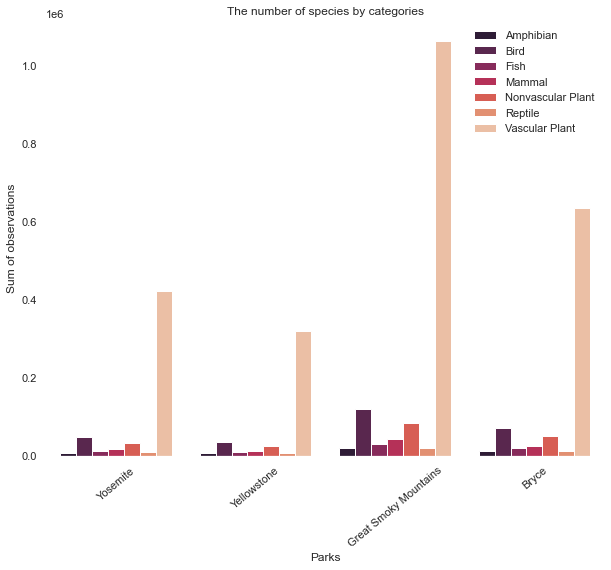

In [251]:
bar_plot_hue(x='park_name', y='observations', data=observations_by_cat, titl='The number of species by categories', x_label='Parks', y_label='Sum of observations', labels=labels, hue='category')

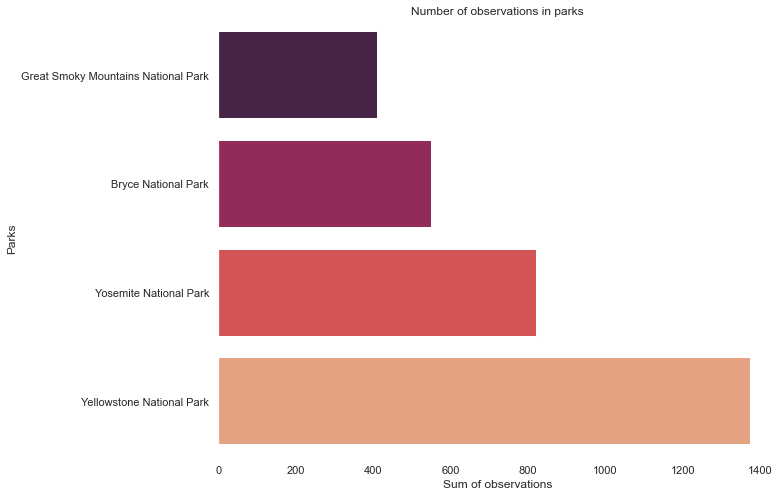

In [252]:
park_observations = df.groupby('park_name').observations.sum().reset_index()
park_observations = park_observations.sort_values(by='observations')
park_observations['observations_in_thousands'] = park_observations['observations']/1000
bar_plot(x = 'observations_in_thousands',y = 'park_name', data=park_observations, titl = 'Number of observations in parks', x_label = 'Sum of observations', y_label='Parks', hue=None)